In [93]:
import pandas as pd
import numpy as np

csv = pd.read_csv('auto-mpg.csv')
csv

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [94]:
import scipy.stats as st
from sklearn.linear_model import LinearRegression

csv['horsepower'] = pd.to_numeric(csv['horsepower'], errors='coerce')

csv = csv.dropna(subset=['horsepower', 'mpg'])

X = csv['horsepower'].values.reshape(-1, 1)
Y = csv['mpg'].values
LR = LinearRegression().fit(X, Y)

coef= LR.coef_[0]
intercept = LR.intercept_

print(f"Findings (all values rounded to 2 decimal places)\n")

print(f"Coefficient (slope): {round(coef, 2)}")
print(f"Intercept: {round(intercept, 2)}")
print(f"Linear Equation: y = {round(coef, 2)}x + {round(intercept, 2)}\n")

r_sq = LR.score(X, Y)
correlation_coefficient = csv['horsepower'].corr(csv['mpg'])

print(f"Correlation Coefficient: {round(correlation_coefficient, 2)}")
print(f"Coefficient of determination (R\u00b2): {round(r_sq, 2)}\n")

print(f"Prediction for 98 mpg: {round(98*coef + intercept, 2)} mpg")

Findings (all values rounded to 2 decimal places)

Coefficient (slope): -0.16
Intercept: 39.94
Linear Equation: y = -0.16x + 39.94

Correlation Coefficient: -0.78
Coefficient of determination (R²): 0.61

Prediction for 98 mpg: 24.47 mpg


There is a relationship between predictor and response. Our R^2 value tell us that around 57% of the variation in mpg can be explained by horsepower. The Correlation Coefficient suggests that there is a strong negative corellation between horsepower and mpg. The relationship is negative (negative slope) and according to this model horsepower of 98 would be associated with a mpg of approximately 24.47.

In [79]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm
#statsmodels used for simplicity in prediction/confidence interval calculation

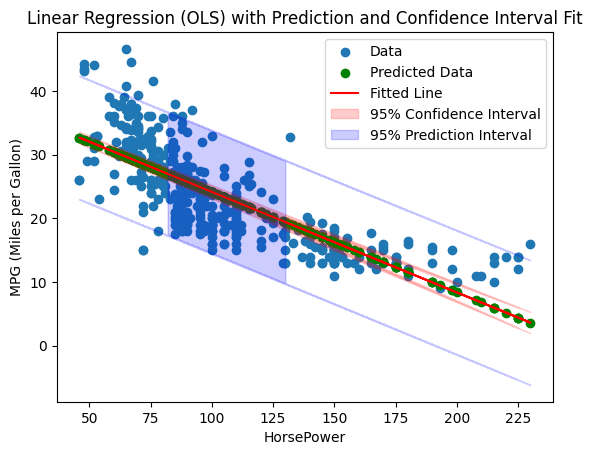

prediction for 98 horsepower:  [24.46707715]


In [80]:
#reference guide (source code for dataframe params): https://www.statsmodels.org/dev/_modules/statsmodels/regression/_prediction.html
#convert horse to float
horse = horse.astype(float)
X = sm.add_constant(horse)
model = sm.OLS(mpg, X).fit()
conf_intervals = model.conf_int(alpha=0.05)

# Get prediction results
pred = model.get_prediction(X)
pred_summary = pred.summary_frame(alpha=0.05)  # 95% confidence intervals

# Extract confidence intervals
ci_lower = pred_summary['mean_ci_lower']
ci_upper = pred_summary['mean_ci_upper']
#prediction intervals
pi_lower = pred_summary['obs_ci_lower']
pi_upper = pred_summary['obs_ci_upper']

# Plot the data
plt.scatter(horse, mpg, label='Data')
#plot actual predictions data
plt.scatter(horse, model.fittedvalues, color='green', label='Predicted Data')
plt.plot(horse, model.fittedvalues, color='red', label='Fitted Line')
plt.fill_between(horse, ci_lower, ci_upper, color='red', alpha=0.2, label='95% Confidence Interval')
plt.fill_between(horse, pi_lower, pi_upper, color='blue', alpha=0.2, label='95% Prediction Interval')
plt.xlabel('HorsePower')
plt.ylabel('MPG (Miles per Gallon)')
plt.title('Linear Regression (OLS) with Prediction and Confidence Interval Fit')
plt.legend()
plt.show()

#get model prediction for horsepower 98
pred = model.get_prediction([1, 98])
print("prediction for 98 horsepower: ", pred.predicted_mean) #same as OLS sklearn linear regression

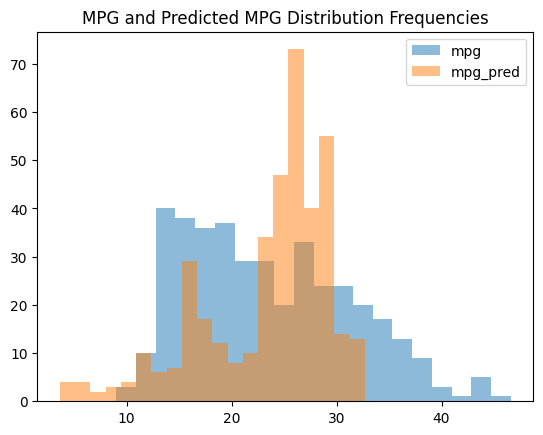

In [82]:
#plot distribution of mpg pred and mpg
plt.hist(mpg, bins=20, alpha=0.5, label='mpg')
plt.hist(mpg_pred, bins=20, alpha=0.5, label='mpg_pred')
#legend
plt.legend(loc='upper right')
plt.title('MPG and Predicted MPG Distribution Frequencies')
plt.show()


In [84]:
#show confidence interval ranges lower and upper bounds
print("Confidence Interval Lower Bound Range: ", ci_lower.min(), ci_lower.max())
print("Confidence Interval Upper Bound Range: ", ci_upper.min(), ci_upper.max())
print("Prediction Interval Lower Bound Range: ", pi_lower.min(), pi_lower.max())
print("Prediction Interval Upper Bound Range: ", pi_upper.min(), pi_upper.max())

Confidence Interval Lower Bound Range:  1.967894002228789 31.78826458849256
Confidence Interval Upper Bound Range:  5.295250697431527 33.561741985312274
Prediction Interval Lower Bound Range:  -6.1558989938625395 22.989288280843972
Prediction Interval Upper Bound Range:  13.419043693522855 42.36071829296086
